In [1]:
# %matplotlib notebook
import pandas
import matplotlib.pyplot as plt
from datetime import datetime
from sys import argv
import numpy as np
from functools import reduce

In [2]:
def graph_coverages(results_path, figures_path):
    name = 'Coverages Overlayed'
    contents = pandas.read_csv(results_path + "/metrics.csv")

    pairs = [pair.replace("(", "").replace(")", "").split(',') for pair in contents['percent_coverage']]
    pairs = [(float(pair[0]), float(pair[1])) for pair in pairs]
    primary = [pair[0] for pair in pairs]
    secondary = [pair[1] for pair in pairs]

    datetimes = [datetime.strptime(d, "%Y-%m-%d %H:%M:%S.%f") for d in contents['timestamp']]
    primaries = [(datetimes[i], primary[i]) for i in range(len(datetimes))]
    secondaries = [(datetimes[i], secondary[i]) for i in range(len(datetimes))]

    primaries.sort()
    secondaries.sort()


    print(results_path + name)
    plt.figure(results_path + name)
#     plt.rcParams['figure.figsize'] = [10, 5]
    plt.ylim(-5, 105)
#     plt.plot([pair[0] for pair in secondaries], [pair[1] for pair in secondaries], 'rx')
#     plt.plot([pair[0] for pair in primaries], [pair[1] for pair in primaries], 'bx')
    plt.plot([pair[0] for pair in secondaries], [pair[1] for pair in secondaries], 'r-')
    plt.plot([pair[0] for pair in primaries], [pair[1] for pair in primaries], 'b-')

    plt.savefig(figures_path + name + '.pdf')
    plt.show()

In [3]:
def graph_times(results_path, figures_path):
    name =  "Time from Base to Emergency in Minutes"
    contents = pandas.read_csv(results_path + "/processed_cases.csv")

    # Only the to incident
    times = np.array([[pandas.to_timedelta(td).total_seconds()/60 
                       for td in [contents.values[i][7]]] for i in range(len(contents.values))])


    case_durations = [reduce(lambda a, b: a + b, p, 0.0) for p in times]
    
    within_r1 = [c for c in case_durations if c < 10]
    within_r2 = [c for c in case_durations if c < 14 and c >= 10]
    outside   = [c for c in case_durations if c >= 14]
    
    print("r1: {}, r2: {}, >r2: {}.".format(len(within_r1), len(within_r2), len(outside)))
    
    print(results_path + name)
    plt.figure(results_path +name)

    plt.ylim(-5, 45)
    plt.plot(case_durations, 'ko')
    plt.plot([0, len(case_durations)], [10, 10], 'r-')
    plt.plot([0, len(case_durations)], [14, 14], 'y-')
    plt.savefig(figures_path + name + '.pdf')

    plt.show()

In [4]:
def graph_times_priority_1(results_path, figures_path):
    name = "Time from Base to Emergency in Minutes - Priority 1 Only"

    contents = pandas.read_csv(results_path + "/processed_cases.csv")

    times = np.array([[pandas.to_timedelta(td).total_seconds()/60 
                       for td in [contents.values[i][7]]] for i in range(len(contents.values))
                     if contents.values[i][4] == 1])


    case_durations = [reduce(lambda a, b: a + b, p, 0.0) for p in times]
    
    print(len(case_durations))
        
    within_r1 = [c for c in case_durations if c < 10]
    within_r2 = [c for c in case_durations if c < 14 and c >= 10]
    outside   = [c for c in case_durations if c >= 14]
    
    print("r1: {}, r2: {}, >r2: {}.".format(len(within_r1), len(within_r2), len(outside)))

    print(results_path + name)
    plt.figure(results_path + name)

    plt.ylim(-5, 45)
    plt.plot(case_durations, 'ko')
    plt.plot([0, len(case_durations)], [10, 10], 'r-')
    plt.plot([0, len(case_durations)], [14, 14], 'y-')
    
    plt.savefig(figures_path + name + '.pdf')
    plt.show()

In [5]:
def graph_times_priority_2(results_path, figures_path):
    name = "Time from Base to Emergency in Minutes - Priority 1 and 2 "

    contents = pandas.read_csv(results_path + "/processed_cases.csv")

    times = np.array([[pandas.to_timedelta(td).total_seconds()/60 
                       for td in [contents.values[i][7]]] for i in range(len(contents.values))
                     if contents.values[i][4] == 1 or contents.values[i][4] == 2])

    case_durations = [reduce(lambda a, b: a + b, p, 0.0) for p in times]
    print(len(case_durations))

    within_r1 = [c for c in case_durations if c < 10]
    within_r2 = [c for c in case_durations if c < 14 and c >= 10]
    outside   = [c for c in case_durations if c >= 14]
    
    print("r1: {}, r2: {}, >r2: {}.".format(len(within_r1), len(within_r2), len(outside)))
    
    print(results_path + name)
    plt.figure(results_path + name)

    plt.ylim(-5, 45)
    plt.plot(case_durations, 'ko')
    plt.plot([0, len(case_durations)], [10, 10], 'r-')
    plt.plot([0, len(case_durations)], [14, 14], 'y-')
    
    plt.savefig(figures_path + name + '.pdf')
    plt.show()

In [6]:
def graph_delay(results_path, figures_path):
    name_minutes = 'Total Case Delay in Minutes'
    name_cases = 'Total number of cases being delayed'
    
    contents = pandas.read_csv(results_path + "/metrics.csv")
    
    metrics = []
    for values in contents.values:
        metrics.append((
            datetime.strptime(values[0], "%Y-%m-%d %H:%M:%S.%f"),
            pandas.to_timedelta(values[2]).total_seconds()/60,
            values[3]
        ))
        
    metrics.sort()
    
    
    print(results_path + name_minutes)
    plt.figure(results_path + name_minutes)

    plt.plot(
        [p[0] for p in metrics],
        [p[1] for p in metrics],
        'r-'
    )
    plt.plot(
        [p[0] for p in metrics],
        [p[1] for p in metrics],
        'rx'
    )
    plt.savefig(figures_path + name_minutes + '.pdf')
    plt.show() # Comment out if using matplotlib notebooks.
    
    print(results_path + name_cases)
    plt.figure(results_path + name_cases)

    plt.plot(
        [p[0] for p in metrics],
        [p[2] for p in metrics],
        'r-'
    )
    plt.plot(
        [p[0] for p in metrics],
        [p[2] for p in metrics],
        'rx'
    )
    plt.savefig(figures_path + name_cases + '.pdf')
    plt.show()
    

In [7]:
def graph(results_path, figures_path):
    print('*' * 80)
    plt.rcParams['figure.figsize'] = [15, 10]
    graph_times(results_path, figures_path)
    graph_times_priority_1(results_path, figures_path)
    graph_times_priority_2(results_path, figures_path)
#     graph_coverages(results_path, figures_path)
#     graph_delay(results_path, figures_path)
    print('*' * 80)
    print('\n' * 5)


********************************************************************************
r1: 195, r2: 97, >r2: 32.
../results/dibene-xtreme-freq-best-travel-times/Time from Base to Emergency in Minutes


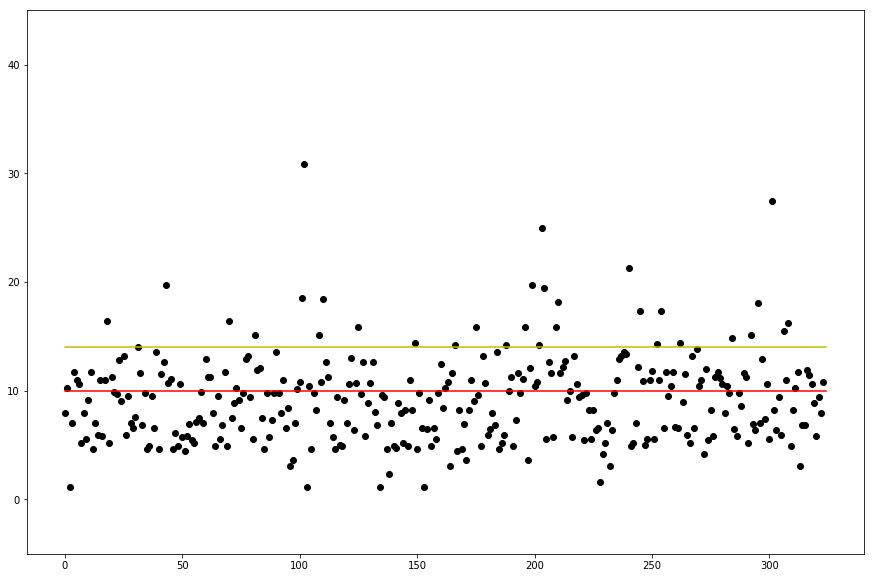

12
r1: 5, r2: 5, >r2: 2.
../results/dibene-xtreme-freq-best-travel-times/Time from Base to Emergency in Minutes - Priority 1 Only


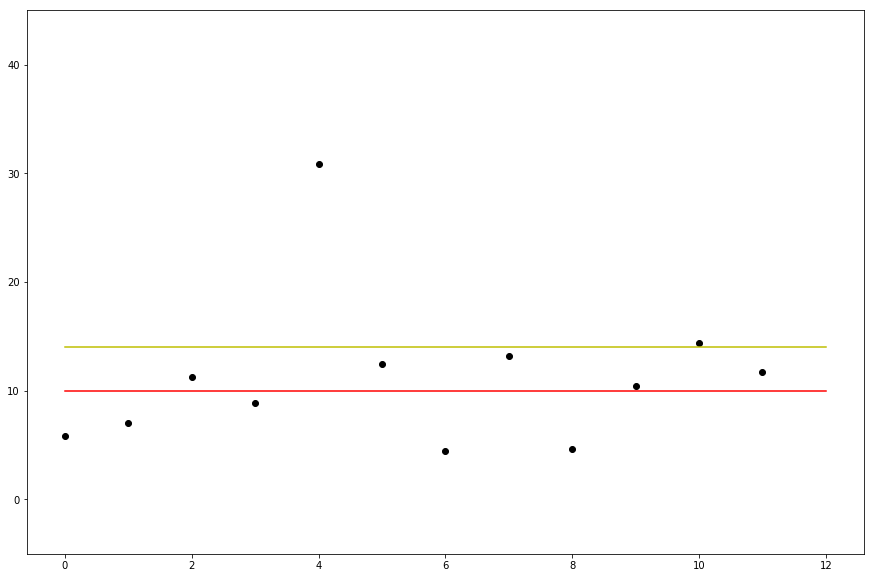

21
r1: 12, r2: 6, >r2: 3.
../results/dibene-xtreme-freq-best-travel-times/Time from Base to Emergency in Minutes - Priority 1 and 2 


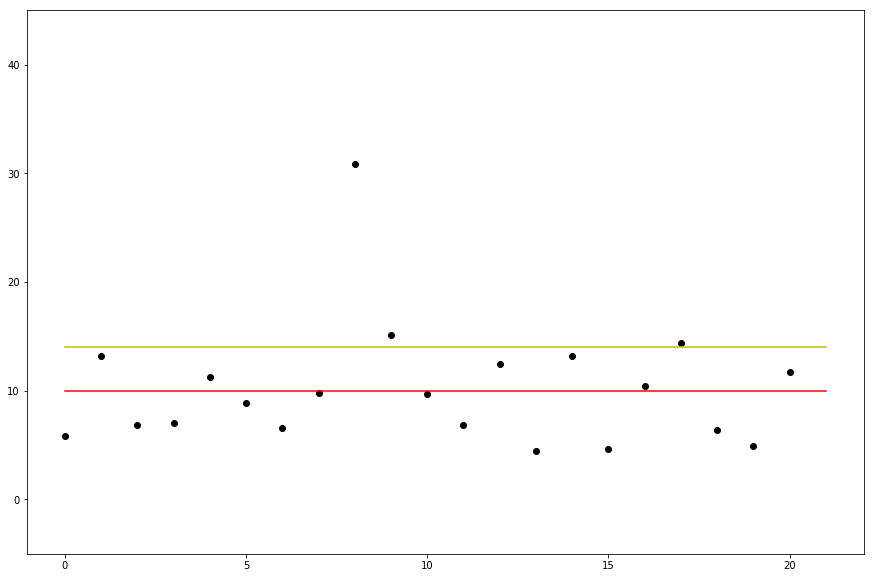

********************************************************************************






********************************************************************************
r1: 196, r2: 98, >r2: 30.
../results/dibene-xtreme-freq-optimal-dispatch/Time from Base to Emergency in Minutes


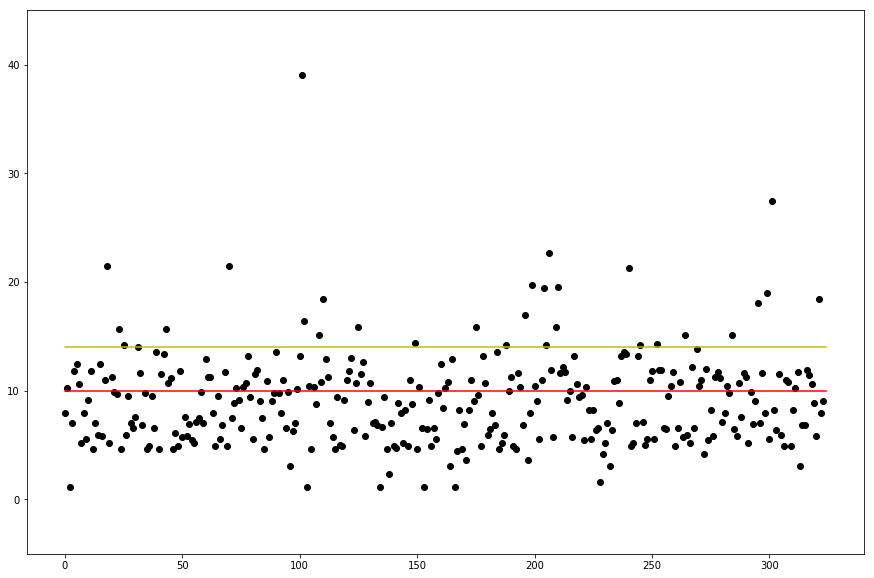

12
r1: 5, r2: 6, >r2: 1.
../results/dibene-xtreme-freq-optimal-dispatch/Time from Base to Emergency in Minutes - Priority 1 Only


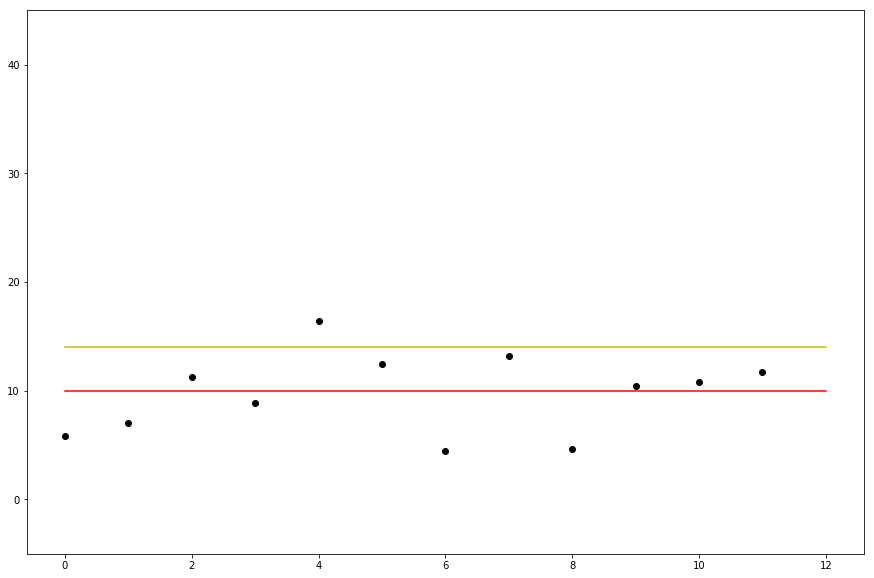

21
r1: 11, r2: 7, >r2: 3.
../results/dibene-xtreme-freq-optimal-dispatch/Time from Base to Emergency in Minutes - Priority 1 and 2 


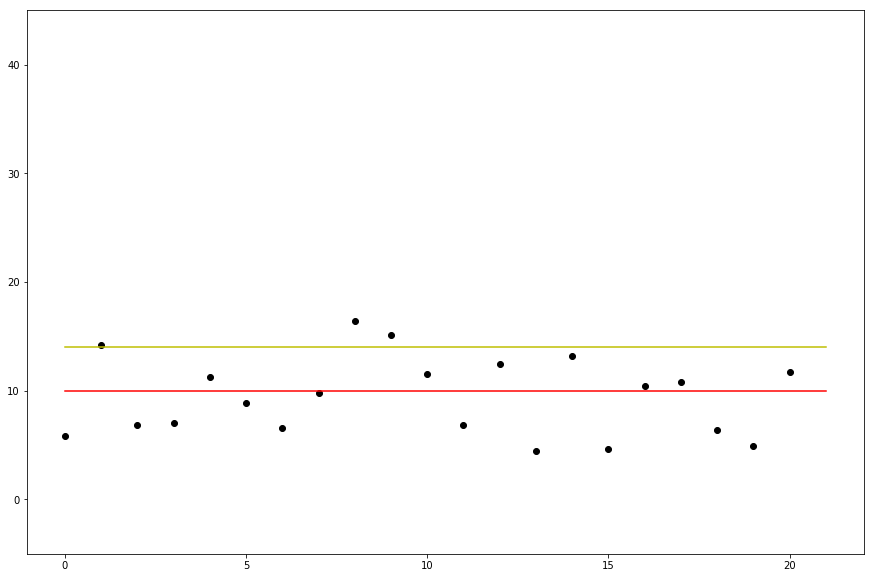

********************************************************************************








In [8]:

scenarios = [
    "dibene-xtreme-freq-best-travel-times",
#     "dibene-xtreme-freq-least-disruption",
    "dibene-xtreme-freq-optimal-dispatch",
]

results_path = ["../results/{}/".format(name) for name in scenarios]
figures_path = ["../results/{}/".format(name) for name in scenarios]

for i in range(len(scenarios)):
    graph(results_path[i], results_path[i])